### Loading the Dataset



In [220]:
import pandas as pd

In [221]:
df = pd.read_csv('tweets_labelled.csv')
df.head()

,Date,User,Tweet,emotion
0,2023-04-15 11:02:21+00:00,Hellstorm901,@vicktop55 Fact Check - Buildings which Ukrain...,fear
1,2023-04-15 11:02:07+00:00,MaryMaryLin8,#NaziRussia #Russia #WarCrimes #WarCrimesofRus...,anger
2,2023-04-15 11:02:05+00:00,elwrshfany,WARNING GRAPHIC CONTENT 18+ | Ukrainian armore...,sadness
3,2023-04-15 11:02:01+00:00,jeaniegirlTN,@TheSpectator He may be right as Biden is an o...,anger
4,2023-04-15 11:01:57+00:00,yusr35144430,🔴Russian War--Footage of The Attack on Katsap ...,fear


### Maping the emotions to numeric labels

In [222]:
mapping = {
    'anger' : 0,
    'fear' : 1,
    'sadness' : 2,
    'surprise' : 3,
    'joy' : 4,
    'love' : 5,
}

In [223]:
df['emotion_numeric'] = df['emotion'].replace(mapping)

In [224]:
df.head()

,Date,User,Tweet,emotion,emotion_numeric
0,2023-04-15 11:02:21+00:00,Hellstorm901,@vicktop55 Fact Check - Buildings which Ukrain...,fear,1
1,2023-04-15 11:02:07+00:00,MaryMaryLin8,#NaziRussia #Russia #WarCrimes #WarCrimesofRus...,anger,0
2,2023-04-15 11:02:05+00:00,elwrshfany,WARNING GRAPHIC CONTENT 18+ | Ukrainian armore...,sadness,2
3,2023-04-15 11:02:01+00:00,jeaniegirlTN,@TheSpectator He may be right as Biden is an o...,anger,0
4,2023-04-15 11:01:57+00:00,yusr35144430,🔴Russian War--Footage of The Attack on Katsap ...,fear,1


### Cleaning the tweet data

In [225]:
import re

def clean_tweet(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'(RT[\s]+|:[\s]+)', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    return text


In [226]:
df['Tweet'] = df['Tweet'].apply(lambda twt: clean_tweet(twt))

In [227]:
df.head()

,Date,User,Tweet,emotion,emotion_numeric
0,2023-04-15 11:02:21+00:00,Hellstorm901,Fact Check - Buildings which Ukraine knew Rus...,fear,1
1,2023-04-15 11:02:07+00:00,MaryMaryLin8,NaziRussia Russia WarCrimes WarCrimesofRussia ...,anger,0
2,2023-04-15 11:02:05+00:00,elwrshfany,WARNING GRAPHIC CONTENT 18+ | Ukrainian armore...,sadness,2
3,2023-04-15 11:02:01+00:00,jeaniegirlTN,He may be right as Biden is an old grifter la...,anger,0
4,2023-04-15 11:01:57+00:00,yusr35144430,🔴Russian War--Footage of The Attack on Katsap ...,fear,1


### Removing emojis from the tweets

In [228]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [229]:
df['Tweet'] = df['Tweet'].apply(lambda twt: deEmojify(twt))

In [230]:
df.head()

,Date,User,Tweet,emotion,emotion_numeric
0,2023-04-15 11:02:21+00:00,Hellstorm901,Fact Check - Buildings which Ukraine knew Rus...,fear,1
1,2023-04-15 11:02:07+00:00,MaryMaryLin8,NaziRussia Russia WarCrimes WarCrimesofRussia ...,anger,0
2,2023-04-15 11:02:05+00:00,elwrshfany,WARNING GRAPHIC CONTENT 18+ | Ukrainian armore...,sadness,2
3,2023-04-15 11:02:01+00:00,jeaniegirlTN,He may be right as Biden is an old grifter la...,anger,0
4,2023-04-15 11:01:57+00:00,yusr35144430,Russian War--Footage of The Attack on Katsap P...,fear,1


### Importing and Downloading necessary NLTK resources

In [231]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [364]:
stemmer = SnowballStemmer(language = 'english')
english_stopwords = stopwords.words('english')
english_stopwords = english_stopwords[:116]
','.join(english_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such"

### Function to convert chat acronyms to full form

In [233]:
chat_words = {
    "lol": "laugh out loud",
    "brb": "be right back",
    "omg": "oh my god",
    "jk": "just kidding",
    "fyi": "for your information",
    "btw": "by the way",
    "afaik": "as far as I know",
    "idk": "I don't know",
    "imo": "in my opinion",
    "tbh": "to be honest",
    "ty": "thank you",
    "yw": "you're welcome",
    "np": "no problem",
    "gg": "good game",
    "wp": "well played",
    "ggwp": "good game, well played",
    "irl": "in real life",
    "imo": "in my opinion",
    "smh": "shaking my head",
    "tfw": "that feeling when",
    "thx": "thanks",
    "wtf": "what the f***",
    "omw": "on my way",
    "jk": "just kidding",
    "rn": "right now",
    "afk": "away from keyboard",
    "b4": "before",
    "cu": "see you",
    "dbmib": "don't bother me I'm busy",
    "dl": "download",
    "dw": "don't worry",
    "ez": "easy",
    "ffs": "for f***'s sake",
    "fu": "f*** you",
    "hbu": "how about you",
    "hru": "how are you",
    "ic": "I see",
    "idc": "I don't care",
    "ikr": "I know, right",
    "ily": "I love you",
    "imho": "in my humble opinion",
    "lmao": "laughing my ass off",
    "lmk": "let me know",
    "nbd": "no big deal",
    "nvm": "nevermind",
    "ofc": "of course",
    "ppl": "people",
    "rofl": "rolling on the floor laughing",
    "srsly": "seriously",
    "stfu": "shut the f*** up",
    "tmi": "too much information",
    "ttyl": "talk to you later",
    "u": "you",
    "ur": "your",
    "wbu": "what about you",
    "wth": "what the hell",
    "yolo": "you only live once",
    "yw": "you're welcome",
    "amp": "and"
}

def chat_conversation(text):
  new_text = []
  for word in text.split():
    if word.lower() in chat_words:
      new_text.append(chat_words[word.lower()])
    else:
      new_text.append(word)
  return " ".join(new_text)

### Tokenization function

In [234]:
def tokenize(text):
    text = chat_conversation(text.lower())
    # textBlb = TextBlob(txt)
    # text = textBlb.correct().string
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha() and token not in english_stopwords]

In [235]:
tokenize('What a wonderful lifee !!')

['wonder', 'life']

### Initializing the TFIDF Vector


In [276]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [332]:
vectorizer = TfidfVectorizer(
    tokenizer = tokenize,
    ngram_range = (1,2),
    max_features = 1500
)

### Spliting the dataset into Test and Train

In [353]:
from sklearn.model_selection import train_test_split

In [354]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['emotion_numeric'], test_size=0.2, random_state=500)

### Fiting the vectorizer to training data and transforming both the training and testing data


In [355]:
vectorizer.fit_transform(X_train)

<2560x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 40139 stored elements in Compressed Sparse Row format>

In [358]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [359]:
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6390625


In [360]:
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.91      0.75       353
           1       0.91      0.20      0.32        51
           2       0.83      0.16      0.27        62
           3       1.00      0.00      0.00         3
           4       0.62      0.41      0.49       167
           5       1.00      0.00      0.00         4

    accuracy                           0.64       640
   macro avg       0.83      0.28      0.31       640
weighted avg       0.68      0.64      0.59       640



Confusion Matrix:
 [[321   0   1   0  31   0]
 [ 40  10   1   0   0   0]
 [ 44   0  10   0   8   0]
 [  3   0   0   0   0   0]
 [ 98   1   0   0  68   0]
 [  2   0   0   0   2   0]]


<Axes: >

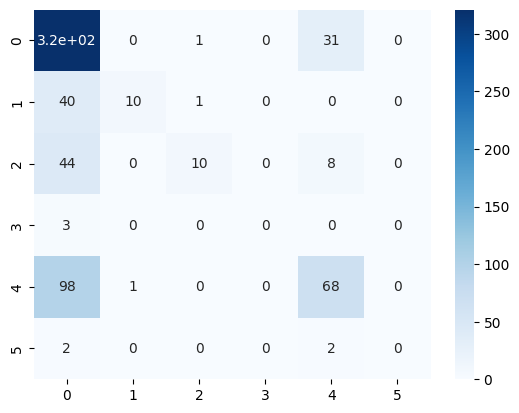

In [361]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

sns.heatmap(cm, annot=True, cmap='Blues')